## Reference: 
    # Python implementation of madgwick:    https://github.com/morgil/madgwick_py
    # http://x-io.co.uk/open-source-imu-and-ahrs-algorithms/
    # https://github.com/jordanlui/deadReckon
        

## Read Data

In [1]:
from madgwickahrs import * 
from quaternion import Quaternion
from conversion import * 

In [ ]:
<Euler (x=5.7945, y=0.0000, z=0.0000), order='XYZ'>
<Quaternion (w=0.9703, x=-0.2419, y=0.0000, z=0.0000)>

<Euler (x=5.7596, y=0.0000, z=0.0000), order='XYZ'>
<Quaternion (w=0.9659, x=-0.2588, y=0.0000, z=0.0000)>
frame

-0.5235454772296476
0.0
0.0


In [7]:
Acc_x = [0.63623046875,0.673828125,0.65283203125,0.61865234375,0.66162109375]
Acc_y = [0.4814453125,0.48193359375,0.47607421875,0.4619140625,0.4267578125]
Acc_z = [-0.6181640625,-0.6337890625,-0.6337890625,-0.60498046875,-0.62109375]
Gyro_x = [-8.09923664122137,-9.83969465648855,-5.54198473282442,-2.26717557251908,3.37404580152671]
Gyro_y = [4.37404580152671,-0.396946564885496,1.07633587786259,1.98473282442748,-7.03053435114503]
Gyro_z = [3.8473282442748,1.16793893129771,5.206106870229,10.4656488549618,3.54198473282442]


# Acc_x = [-0.4216,-1.0884,-0.9806,-1.5003,-0.9904]
# Acc_y = [-0.0392,-0.5883,-0.3628,-0.5099,-0.7844]
# Acc_z = [-9.6589,-10.2375,-9.5805,-10.0806,-9.7374]
# Gyro_x = [-0.6956,-0.8347,-1.0434,-0.5565,-0.8347]
# Gyro_y = [-2.0173,-3.2,-1.5304,-3.1304,-1.7391]
# Gyro_z = [-0.2086,-0.2782,-0.2086,-0.1391,0]


Acc = []
Gyro = []

for i in range(len(Acc_x)):
    Acc.append([Acc_x[i], Acc_y[i], Acc_z[i]])
    Gyro.append([Gyro_x[i], Gyro_y[i], Gyro_z[i]])

print(np.array(Acc).shape)
print(np.shape(Acc_x))

(5, 3)
(5,)


## Madgwick Algorithm

In [69]:
frequency = 256
sampleperiod = 1/frequency

rot_mat = []
Imupredict = MadgwickAHRS()
Imupredict.sampleperiod = sampleperiod

for i in range(len(Acc_x)):
    Imupredict.update_imu( Gyro[i], Acc[i])
    q = Imupredict.quaternion
    print(q[0], q[1], q[2], q[3])
    rot_mat.append( np.transpose(quaterniontorotmatrix(q)))


0.999866453262387 -0.01345990803431425 0.005427402425124626 0.007513309465115724
0.9994881648779089 -0.030397713637861406 0.0013514156428371036 0.009877294687345174
0.9990403964778722 -0.039015614939077584 0.00043671733491278624 0.019896664902211057
0.9983438111765205 -0.041266491511568484 0.001823776358615152 0.04004229268734961
0.9982557428408492 -0.03205454371733981 -0.014643150580523722 0.04736619314884592


In [4]:
Earth_acc = []
for i in range(len(Acc)):
    Earth_acc.append(rot_mat[i]*np.transpose([Acc[i]]))

## Linear Acceleration, linear velocity, linear position

In [198]:
# linAcc = tcAcc - [zeros(length(tcAcc), 1), zeros(length(tcAcc), 1), ones(length(tcAcc), 1)];
# linAcc = linAcc * 9.81;     % convert from 'g' to m/s/s


In [199]:
linear_vel = []
prev = np.array([[0],[0],[0]])
linear_vel.append(prev)


for i in range(len(linear_acc)):
    if i == 0:
        pass
    else:
        vel = prev + linear_acc[i]*sampleperiod
        linear_vel.append(vel)
        prev = vel 


In [200]:
linear_pos = []
prev = np.array([[0],[0],[0]])
linear_pos.append(prev)


for i in range(len(linear_vel)):
    if i == 0:
        pass
    else:
        pos = prev + linear_vel[i]*sampleperiod
        linear_pos.append(pos)
        prev = pos


## 2D plot using x and y 

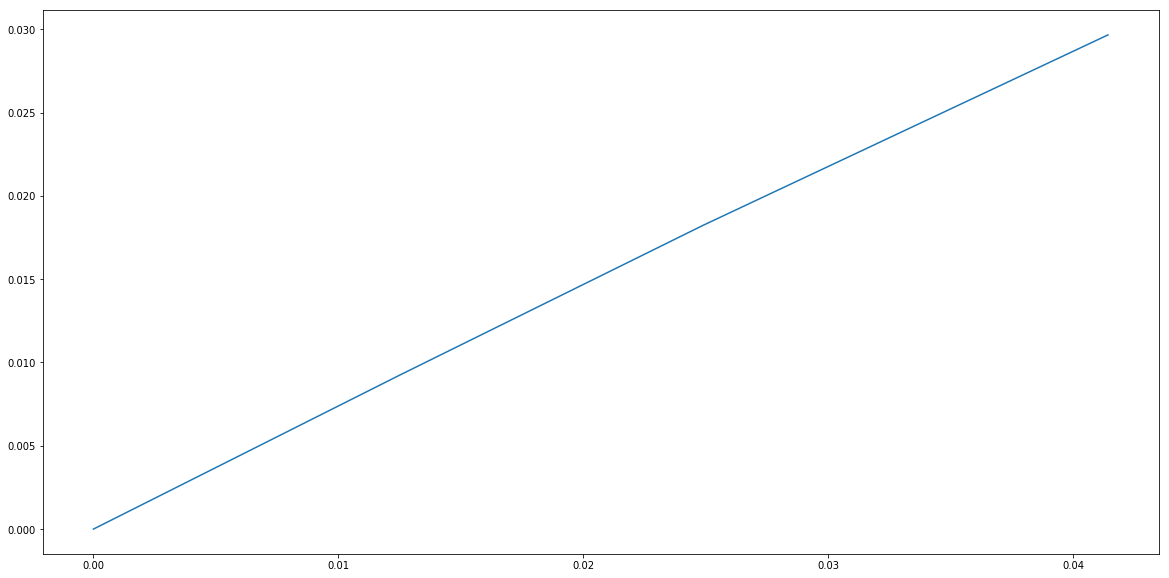

In [188]:
x = []
y = []
z = []

for i in range(len(linear_pos)):
    x.append(linear_pos[i][0][0])
    y.append(linear_pos[i][1][0])
    z.append(linear_pos[i][2][0])
    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.show()

## 3D plot 

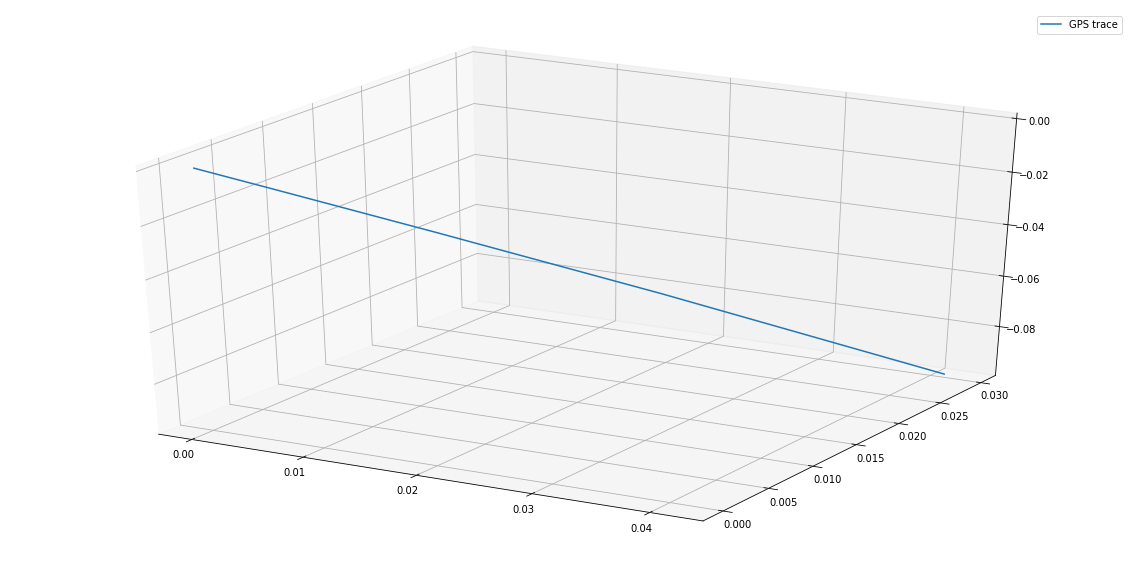

In [189]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

#mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='GPS trace')
ax.legend()

plt.show()
